<a href="https://colab.research.google.com/github/alif-arrizqy/SEIR-Method-to-Model-Pandemic-Covid-19/blob/master/SEIR_Method_to_Model_Pandemic_Covid_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from scipy.integrate import odeint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

url = 'https://raw.githubusercontent.com/alif-arrizqy/SEIR-Method-to-Model-Pandemic-Covid-19/master/SEIR%20-%20JABODETABEK.csv'
data = pd.read_csv(url, error_bad_lines=False)

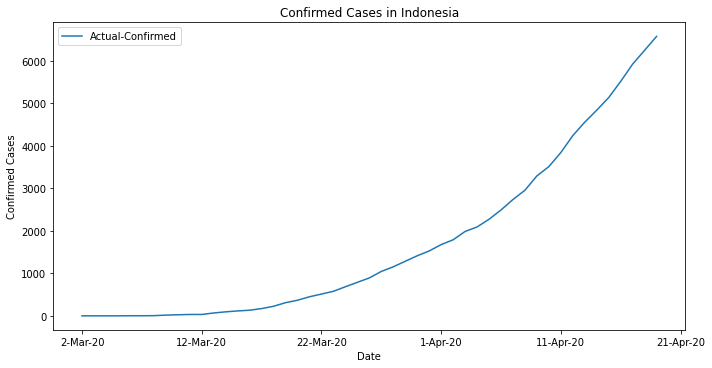

In [0]:
df = data.loc[:, ['Date', 'Actual-Confirmed']]
df.set_index('Date', inplace=True)
df.plot(figsize=(10,5))
plt.ylabel('Confirmed Cases')
plt.tight_layout()
plt.title('Confirmed Cases in Indonesia')
plt.show()

# SEIR Method to Model Pandemic Covid 19
data berdasarkan google sheet 

In [0]:
def plotseir(t, S, E, I, R):
  f, ax = plt.subplots(1, 1, figsize=(15,4))
  ax.plot(t, S, 'b', linewidth=2, label='Susceptible')
  ax.plot(t, E, 'y', linewidth=2, label='Exposed')
  ax.plot(t, I, 'r', linewidth=2, label='Infected')
  ax.plot(t, R, 'g', linewidth=2, label='Recovered')

  ax.set_xlabel('Days')
  ax.set_title('Visualization Model SEIR Method ')

  ax.yaxis.set_tick_params(length=0)
  ax.xaxis.set_tick_params(length=0)
  legend = ax.legend(borderpad=2.0)
  legend.get_frame().set_alpha(0.5)
  for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(False)
  plt.show();

In [0]:
def deriv(y, t, N, beta, gamma, delta):
    S, E, I, R = y
    dSdt = -beta * S * I / N
    dEdt = beta * S * I / N - delta * E
    dIdt = delta * E - gamma * I
    dRdt = gamma * I
    return dSdt, dEdt, dIdt, dRdt

In [0]:
N = 15_000_000
beta = 1.5  # infected person infects 1 other person per day
D = 3.6 # infections duration
gamma = 0.28 / D
delta = 1.0 / 7.0  # incubation period of seven days

S0, E0, I0, R0 = N-1, 0, 2, 0  # initial conditions: zero exposed, two infected

In [0]:
t = np.linspace(0, 100, 1000) # Grid of time points (in days)
y0 = S0, E0, I0, R0 # Initial conditions vector

# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma, delta))
S, E, I, R = ret.T #Transpose

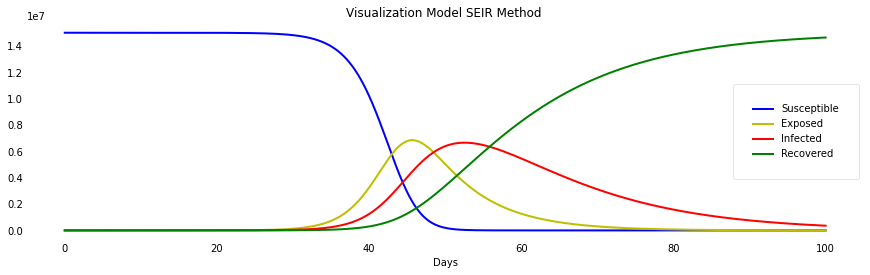

In [0]:
plotseir(t, S, E, I, R)

# SEIR Method to Model Pandemic Covid 19
data berdasarkan artikel dan paper

In [0]:
def plotseir(t, S, E, I, R):
  f, ax = plt.subplots(1, 1, figsize=(15,4))
  ax.plot(t, S, 'b', linewidth=2, label='Susceptible')
  ax.plot(t, E, 'y', linewidth=2, label='Exposed')
  ax.plot(t, I, 'r', linewidth=2, label='Infected')
  ax.plot(t, R, 'g', linewidth=2, label='Recovered')

  ax.set_xlabel('Days')
  ax.set_title('Visualization Model SEIR Method ')

  ax.yaxis.set_tick_params(length=0)
  ax.xaxis.set_tick_params(length=0)
  legend = ax.legend(borderpad=2.0)
  legend.get_frame().set_alpha(0.5)
  for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(False)
  plt.show();

In [0]:
def deriv(y, t, N, beta, gamma, delta):
    S, E, I, R = y
    dSdt = -beta * S * I / N
    dEdt = beta * S * I / N - delta * E
    dIdt = delta * E - gamma * I
    dRdt = gamma * I
    return dSdt, dEdt, dIdt, dRdt

In [0]:
N = 15_000_000
beta = 1.5  # infected person infects 1 other person per day
D = 4.0 # infections duration
gamma = 1.0 / D
delta = 1.0 / 5.0  # incubation period of five days

S0, E0, I0, R0 = N-1, 0, 2, 0  # initial conditions: zero exposed, two infected

In [0]:
t = np.linspace(0, 100, 1000) # Grid of time points (in days)
y0 = S0, E0, I0, R0 # Initial conditions vector

# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma, delta))
S, E, I, R = ret.T #Transpose

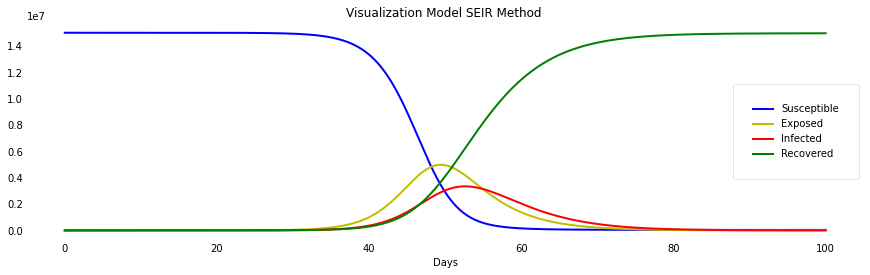

In [0]:
plotseir(t, S, E, I, R)